# Flow-Shop Scheduling

In [624]:
import pandas as pd
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch
import copy
from random import random, shuffle, randrange, getrandbits
import itertools

In [638]:
def get_problem(filepath):
    with open(filepath) as f:
        firstline = f.readline().rstrip()
        nums = firstline.split(" ")     
    data = pd.read_csv(filepath, sep= " ", header=None, skiprows=1)
    return data, nums

def df_to_schedule(data, nums, solution = None):
    data = data.to_numpy()
    jobs = []
    for i,row in enumerate(data):
        jobs.append(Job(row, i+1))
        
    # Reorder jobs in certain order
    # Can be used for checking solutions
    if solution:
        temp = [0] * len(solution)
        for i, job_num in enumerate(solution):
            temp[i] = jobs[job_num-1]
        jobs = temp
        
    schedule = Schedule(jobs, int(nums[1]))
    return schedule
    

In [639]:
df, nums = get_problem("dataset/ta029.txt")
s = df_to_schedule(df, nums, [1,8,14,6,2,13,7,18,17,4,3,11,15,20,9,10,12,16,19,5,])
s.makespan()

2237

In [22]:
df, nums = get_problem("dataset/ta030.txt")
makespan_list = []
best = None
best_t = 10000000
for i in range(500):
    s = df_to_schedule(df, nums)
    s.randomPermutation()
    s.update_times()
    makespan_list.append(s.makespan())
    if (s.makespan() < best_t):
        print(s.makespan())
        best_t = s.makespan()
        best = s

        

gantt_chart(best)
makespan_hist(makespan_list)

AttributeError: 'Schedule' object has no attribute 'randomPermutation'

In [6]:
def gantt_chart(schedule):
#     c_dict = {1:'red', 2:'blue', 3: 'yellow', 4:'green', 5: "orange", 6: "black", 7:"purple", 8: "grey"}
#     def color(row):
#         return c_dict[row['job']]
    df = schedule.get_df()
#     df['color'] = df.apply(color, axis=1)
#     legend_elements = [Patch(facecolor=c_dict[i], label=i)  for i in c_dict]
    df['width'] = (df.end-df.start)
    fig, ax = plt.subplots(1, figsize=(16,6))
    ax.barh(df.machine, df.width, left=df.start, edgecolor='white')
#     plt.legend(handles=legend_elements)
    plt.show()
    print(schedule.makespan())

In [7]:
def iteration_vs_makespan(makespan_list):
    x = [x for x in range(1, len(makespan_list) +1)]
    plt.scatter(x, makespan_list)

In [417]:
def makespan_hist(makespan_list):
    binwidth = 4
    plt.hist(makespan_list, linewidth=2,
             edgecolor='white')
    plt.show()

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
[15, 35, 38, 31, 16, 5, 17, 36, 28, 12, 44, 26, 8, 6, 22, 42, 9, 46, 43, 23, 39, 49, 14, 21, 1, 33, 24, 48, 27, 19, 30, 10, 2, 41, 20, 47, 13, 50, 11, 45, 18, 7, 34, 40, 29, 32, 3, 25, 4, 37]
[0, 0, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 0, 0, 0, 0, 0, 0, 0]


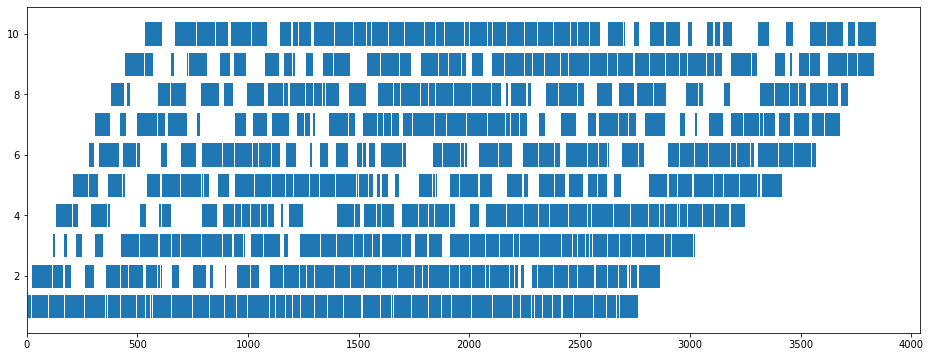

3845


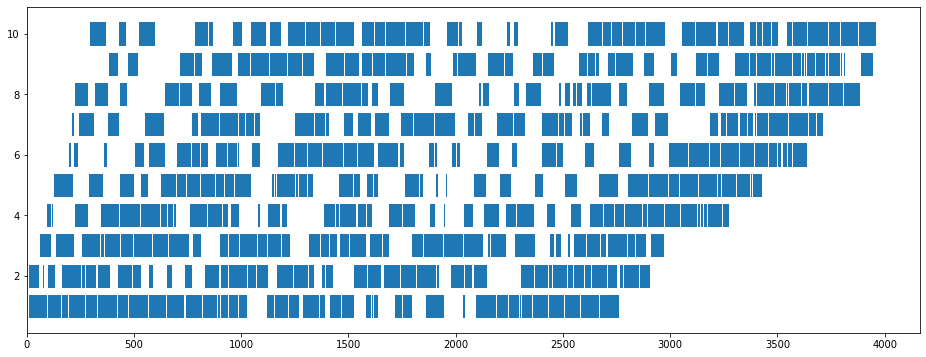

3965


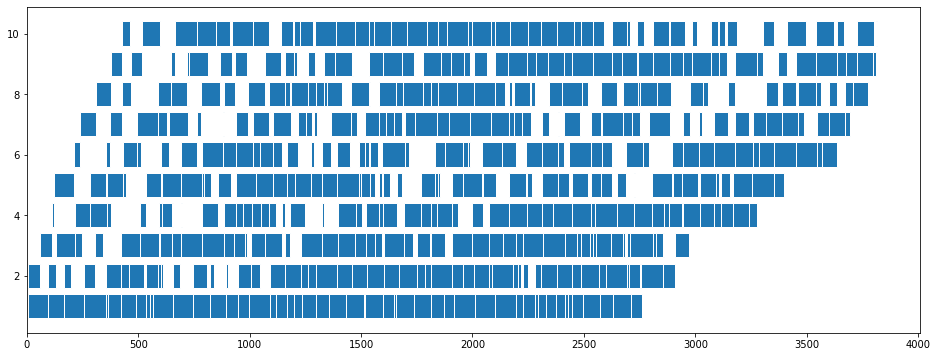

3816


In [200]:
df, nums = get_problem("dataset/ta050.txt")
s1 = df_to_schedule(df, nums)
s1.set_permutation()
print(s1.jobs)
s2 = df_to_schedule(df, nums)
s2.randomize()
print(s2.jobs)

child = GA.tp_cross(s1, s2)
gantt_chart(s1)
gantt_chart(s2)
gantt_chart(child)

In [ ]:
brute_force("dataset/ta050.txt", 1000)

In [644]:
def brute_force(data, bound):
    if isinstance(data, str):
        df, nums = get_problem(data)
        schedule = df_to_schedule(df, nums)
        jobs = schedule.jobss
    else:
        jobs = data
    
    best_makespan = 1000000000
    best_schedule = None
    bound_check = 1
    for job_order in list(itertools.permutations(jobs)):
        s = Schedule(job_order, len(jobs[0].tasks))
        if(s.makespan() < best_makespan):
            best_makespan = s.makespan()
            print(f"New Best Makespan: {best_makespan}")
            best_schedule = s
        if bound_check >= bound:
            break
        bound_check += 1
        
    return best_schedule

Iteration: 0 Current_pop: 150 average_makespan: 1443.22
New best: 1444
New best: 1413
New best: 1392
Iteration: 10 Current_pop: 150 average_makespan: 1437.78
New best: 1377
Iteration: 20 Current_pop: 150 average_makespan: 1445.3133333333333
New best: 1369
Iteration: 30 Current_pop: 150 average_makespan: 1450.3133333333333
New best: 1360
Iteration: 40 Current_pop: 150 average_makespan: 1445.6466666666668
Iteration: 50 Current_pop: 150 average_makespan: 1439.2066666666667
Iteration: 60 Current_pop: 150 average_makespan: 1439.9466666666667
Iteration: 70 Current_pop: 150 average_makespan: 1449.4266666666667
Iteration: 80 Current_pop: 150 average_makespan: 1457.8933333333334
Iteration: 90 Current_pop: 150 average_makespan: 1463.12
Iteration: 100 Current_pop: 150 average_makespan: 1463.1933333333334
Iteration: 110 Current_pop: 150 average_makespan: 1470.4933333333333
New best: 1339
Iteration: 120 Current_pop: 150 average_makespan: 1448.0933333333332
Iteration: 130 Current_pop: 150 average_ma

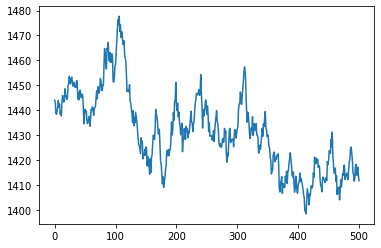

In [623]:
def run(data, generations, pop_size, mutation_rate, crossover_rate):
    # Makespan history
    ms_hist = []
    
    # Randomize schedules from input file jobs
    if isinstance(data, str):
        df, nums = get_problem(data)
        s = df_to_schedule(df, nums)
        initial_pop = [s.random_copy() for x in range(pop_size)]
    # Ranomize schedules from array of jobs
    else:
        initial_pop = [Schedule(data, data[0].n).randomize() for x in range(pop_size)]
    
    current_pop = initial_pop
    
    scores = [s.makespan() for s in current_pop]
    
    best_individual = current_pop[np.argmin(scores)]
    # Track best score found so far
    
    ms_hist.append(sum(scores)/pop_size)
    
    
    for gen in range(generations):
        new_pop = []
        num_clones = pop_size - round((pop_size * crossover_rate))
        num_children = pop_size - num_clones
    
        surviving = GA.roulette_selection(current_pop, num_clones)
        
        for i in range(num_children):
            parents = GA.roulette_selection(current_pop, 2)
            child = GA.op_cross(parents[0], parents[1])
            new_pop.append(child)
            
        new_pop = new_pop + surviving
        
        for schedule in new_pop:
            GA.exchange_mutation(schedule, mutation_rate)
            
        current_pop = new_pop
        if(gen % 10 == 0):
            print(f"Iteration: {gen} Current_pop: {len(current_pop)} average_makespan: {sum([s.makespan() for s in current_pop])/pop_size}")
        
        scores = [s.makespan() for s in current_pop]
        best_in_pop = current_pop[np.argmin(scores)]
        
        if (best_in_pop.makespan() < best_individual.makespan()):
            print(f"New best: {best_individual.makespan()}")
            best_individual = best_in_pop
        
        ms_hist.append(sum(scores)/pop_size)
    return best_individual, ms_hist

s, x = run("dataset/ta001.txt", 500, 150, 0.1, 0.8)
plt.plot(x)
print(s)

In [626]:
print(s)

|15 8 19 9 6 5 3 13 16 4 1 14 17 11 10 7 18 12 2 20 |


In [441]:
pd.DataFrame(x).to_csv(f"experiments/{test.csv")

0
10
20
30
40


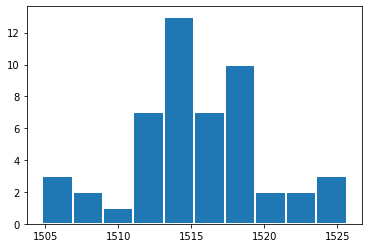

In [449]:
p_size = 150
# jobs = []
# jobs.append(Job([4,2], 1))
# jobs.append(Job([5,6], 2))
# jobs.append(Job([9,8], 3))
# jobs.append(Job([7,1], 4))
# jobs.append(Job([3,11], 5))

df, nums = get_problem("dataset/ta001.txt")
avg = []
s = df_to_schedule(df, nums)
for x in range(50):
    random_pop = [s.random_copy() for x in range(p_size)]
    if(x % 10 == 0):
        print(x)
    avg.append(sum([s.makespan() for s in random_pop])/p_size)
    
#     if(x % 100 == 0):
#         print(min([s.makespan() for s in random_pop]))
makespan_hist(avg)

# avg_roulette = []
# for x in range(500):
#     random_pop = [Schedule(jobs, 2).randomize() for x in range(p_size + 50)]
#     better = GA.roulette_selection(random_pop, 100)
#     assert(len(better) == 100)
#     avg_roulette.append(sum([s.makespan() for s in better])/p_size)
# makespan_hist(avg_roulette)


Iteration: 0 Current_pop: 100 average_makespan: 33.64
Iteration: 10 Current_pop: 100 average_makespan: 26.81
Iteration: 20 Current_pop: 100 average_makespan: 27.45
Iteration: 30 Current_pop: 100 average_makespan: 26.59
Iteration: 40 Current_pop: 100 average_makespan: 23.77


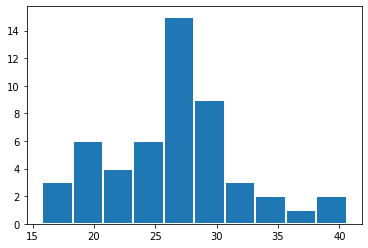

In [413]:
x = run(jobs, 50, p_size, 0.1, 0.8)
makespan_hist(x)

# random

In [370]:
df, nums = get_problem("dataset/ta001.txt")
initial_pop = [df_to_schedule(df, nums).randomize() for x in range(100)]
true = 0
false = 0
for x in range(100):
    better = GA.roulette_selection(initial_pop, 30)
    if(sum([x.makespan() for x in initial_pop[:30]]) > sum([x.makespan() for x in better])):
       true += 1
    else:
       false += 1
print(f"True {true} , False: {false}")

True 32 , False: 68


In [611]:
class GA():
    @staticmethod
    def op_cross(s1, s2):
        j1 = s1.jobs
        j2 = s2.jobs
        child = [0] * len(j1)
        
        # Selecting random index in parent one
        point = randrange(0, len(j1))
        
        LR = bool(getrandbits(1))
        # Going left or right from point to start child gene
        # Left from index
        if(LR):
            child[0:point+1] = j1[0:point+1]
            comp = child[0:point+1]
            empty = [x for x in range(point+1, len(j1))]
        # Right from index
        else:
            child[point:] = j1[point:]
            comp = child[point:]
            empty = [x for x in range(0, point+1)]
        
        index = 0
        # Getting remaining values from second parent, in order
        for i, job in enumerate(j2):
            if job not in comp:
                child[empty[index]] = job
                index += 1
                
        child_s = Schedule(child, s1.m)
            
        return child_s
    
    @staticmethod
    def tp_cross(s1, s2):
        j1 = s1.jobs
        j2 = s2.jobs
        child = [0] * len(j1)
        
        # Selecting two random indexes in parent one
        p1 = randrange(0, len(j1))
        p2 = randrange(0, len(j1))
        
        l = min(p1, p2)
        r = max(p1, p2)
        full = [x for x in range(l, r+1)]
        comp = j1[l:r+1]
        # Going left or right from point to start child gene
        # Left from index
        child[l:r+1] = j1[l:r+1]
        print(child)
                    
        empty_indices = [x for x in range(0, len(j1)) if x not in full]
        
        index = 0     
        for job in j2:
            if job not in comp:
                child[empty_indices[index]] = job
                index += 1
                
        child_s = Schedule(child, s1.m)
            
        return child_s
    
    @staticmethod
    def exchange_mutation(s, prob):
        if(random() > prob):
            return
    
        jobs = s.jobs
        
        p1 = randrange(0, len(jobs))
        p2 = randrange(0, len(jobs)) 
        
        jobs[p1], jobs[p2] = jobs[p2] , jobs[p1]
        
        s.jobs = jobs
        s.set_permutation()
        
    @staticmethod
    def shift_mutation(s, prob):
        if(random() > prob):
            return
    
        jobs = s.jobs
        
        p1 = randrange(0, len(j1)) 
        p2 = randrange(0, len(j1)) 
        job = jobs[p1]
        jobs.remove(p1)
        jobs.add(job, p2)
        
        
        s.jobs = jobs
        s.set_permutations()
        
    @staticmethod
    def roulette_selection(pop, n):
        total_inv = sum([1./s.makespan() for s in pop])

        selection_probs = [(1./s.makespan())/total_inv for s in pop]

        # Take out two least fit individuals
        new_pop = np.random.choice(pop, size=n, replace=False, p=selection_probs)

        return new_pop.tolist()

    # Get index list of sorted fitness
    @staticmethod
    def fitness_indexes(pop):
        fitness_values = []
        for p in pop:
            fitness_values.append(p.makespan())
        return np.argsort(fitness_values)

In [610]:
jobs = []
jobs.append(Job([4,2], 1))
jobs.append(Job([35,6], 2))
jobs.append(Job([9,8], 3))
jobs.append(Job([7,35], 4))
jobs.append(Job([1,11], 5))

# s = Schedule(jobs, 2)

df, nums = get_problem("dataset/ta120.txt")
s1 = df_to_schedule(df, nums)
s2 = df_to_schedule(df, nums)
# Fast makespan
# print(s.fast_makespan())
# print(s.makespan())
# print(s.jobs)
s1.randomize()
print(s1.makespan())
print(s2.makespan())

31134
30148


In [613]:
class Schedule():
    def __init__(self, jobs, num_machines):
        self.jobs = jobs
        
        self.m = num_machines
        
        self.machines = []

        self.set_permutation()
        
        self.makespan_matrix = None
    
#     def randomGenome(self):
#         for m in range(self.m):
#             self.machines.append([])
#             for i, job in enumerate(self.jobs):
#                 if(job.n > m):
#                     self.machines[m].append(job.tasks[m])
#             shuffle(self.machines[m])

    def makespan(self):
        if self.makespan_matrix is None:
            # Num machines x Num Jobs
            end_times = np.zeros((self.m, len(self.jobs)))

            end_times[0][0] = self.jobs[0].tasks[0].length
            for i in range(1, len(self.jobs)):
                end_times[0][i] = end_times[0][i-1] + self.jobs[i].tasks[0].length

            for x in range(1, self.m):
                for y, job in enumerate(self.jobs):
    #                 print(job)
                    if (y ==0):
                        end_times[x][y] = end_times[x-1][y] + job.tasks[x].length
                    else:
                        prereq_end = end_times[x-1][y]

                        prev_task_end = end_times[x][y-1]
    #                     print(fprereq_end, prev_task_end)

                        end_times[x][y] = max(prereq_end, prev_task_end) + job.tasks[x].length

            self.makespan_matrix = end_times
        
        return int(self.makespan_matrix[-1][-1])
                
                
        # First operation on each
        track = self.machines[0]
        track[0].set_start(0)
        for i in range(1, len(track)):
            track[i].set_start(track[i-1].end)
             
        for machine in self.machines[1:]:
            for i, task in enumerate(machine):
                if i == 0:
                    task.set_start(task.parent.end)
                else:
                    #start is the max of parent.end and i-1 End
                    legal_start = max(task.parent.end, machine[i-1].end)
                    task.set_start(legal_start)
            
    def set_permutation(self):
        self.machines = []
        for m in range(self.m):
            self.machines.append([])
            for i, job in enumerate(self.jobs):
                if(job.n > m):
                    self.machines[m].append(job.tasks[m])
        self.update_times()
        
    def randomize(self):
        shuffle(self.jobs)
#         self.set_permutation();
        self.makespan_matrix = None
        return self
    
    def random_copy(self):
        s = Schedule(self.jobs, self.m)
        s.randomize()
        self.makespan_matrix = None
        return s
        
    def set_order(self, jobs):
        assert(len(jobs) == self.jobs)
        self.jobs = jobs
        self.set_permutation()
        self.makespan_matrix = None
        
         
    def update_times(self):
        self.makespan_matrix = None
        # First operation on each
        track = self.machines[0]
        track[0].set_start(0)
        for i in range(1, len(track)):
            track[i].set_start(track[i-1].end)
             
        for machine in self.machines[1:]:
            for i, task in enumerate(machine):
                if i == 0:
                    task.set_start(task.parent.end)
                else:
                    #start is the max of parent.end and i-1 End
                    legal_start = max(task.parent.end, machine[i-1].end)
                    task.set_start(legal_start)
        
    def print_times(self):
        for machine in self.machines:
            track_schedule = ""
            for task in machine:
                track_schedule += f"{task.start} - {task.end} |"
            print(track_schedule)
            
    def get_df(self):
        df = {"job" : [], "task": [],  "start": [], "end": [], "machine": []}
        count = 1
        for i, machine in enumerate(self.machines):
            for task in machine:
                df["job"].append(task.ID[0])
                df["task"].append(task.ID[1])
                df["start"].append(task.start)
                df["end"].append(task.end)
                df["machine"].append(i+1)
                count += 1
        return pd.DataFrame(data=df)

    
    def __repr__(self):
        rep = "|"
        for job in self.jobs:
            rep += str(job) + " "
        return rep + "|"
                    


In [247]:
class Job():
    def __init__(self, length_per_task, job_id=-1):
        self.n = len(length_per_task)
        self.tasks = []
        self.start = 0
        self.end = 0
        self.ID = job_id
        #Linked list of task hierarchy
        for i, length in enumerate(length_per_task):
            self.tasks.append(Task(None, length, (job_id, i)))
        for i in range(1, len(self.tasks)):
            self.tasks[i].parent = self.tasks[i-1]
            
    def __hash__(self):
        return self.ID
    
    def __eq__(self, other):
        return self.ID == other.ID
    
    def __str__(self):
        return str(self.ID)
    
    def __repr__(self):
        return str(self.ID)
                                           

In [248]:
class Task():
    def __init__(self, parent, length, ID = None):
        self.parent = parent # Task that preceedes this
        self.length = length # How long task will take
        self.ID = ID
        
    def __str__(self):
        return str(self.ID)
    
    def set_start(self, start):
        self.start = start
        self.end = start + self.length